In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import NullFormatter

In [51]:
lambd = 0.69
lambda_values = [0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76]
print(lambda_values)
chains = 10
iterations = 1000000
colors = ['royalblue', 'orangered', 'seagreen']

[0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76]


### Phase transition

<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\4212658335.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(x=np.log(2), color='r', linestyle='--', label='$\lambda = ln(2)$')
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\4212658335.py:30: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Final volume to initial volume for different $\lambda$ values', fontsize=16)


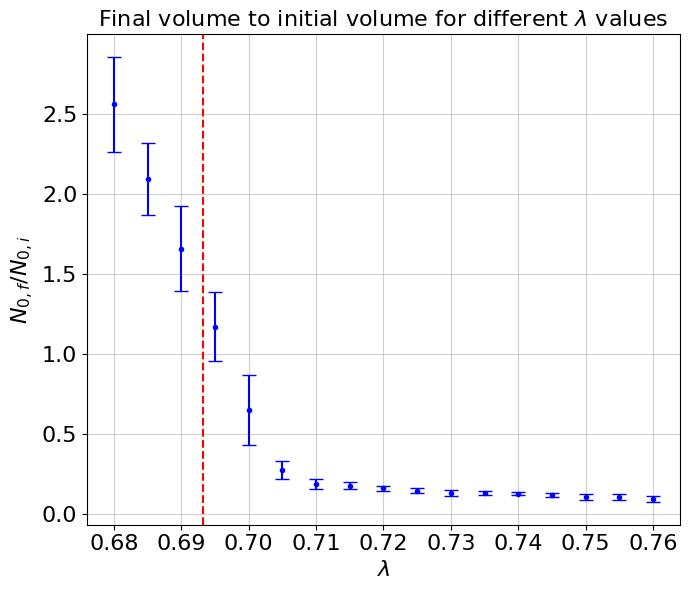

In [52]:
final_volume_dict = {l: [] for l in lambda_values}

for l in lambda_values:
    # Get npy files for each lambda
    path = f'measurements/lambd={l}'
    files = glob.glob(f'{path}/volume_changes*.npy')

    # Load all the files
    for file in files:
        volume_changes = np.load(file)
        final_volume_dict[l].append(volume_changes[-1])

# Make it a df
df = pd.DataFrame(final_volume_dict).T
df.index.name = 'lambda'
df.columns.name = 'chain'

# New df with final volume to initial volume
df = df / 2000
df['mean'] = df.mean(axis=1)
df['std'] = df.std(axis=1)
df

# Plot final volume to initial volume = 2000
plt.figure(figsize=(7, 6))
plt.errorbar(df.index, df['mean'], yerr=df['std'], fmt='.', capsize=5, c='blue')
plt.axvline(x=np.log(2), color='r', linestyle='--', label='$\lambda = ln(2)$')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('$N_{0,f} / N_{0,i}$', fontsize=16)
plt.title('Final volume to initial volume for different $\lambda$ values', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = 'plots/final_volume_to_initial_volume.png'
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(savepath, dpi=400, bbox_inches='tight')



### Acceptance ratios

<>:52: SyntaxWarning: invalid escape sequence '\l'
<>:54: SyntaxWarning: invalid escape sequence '\l'
<>:85: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
<>:54: SyntaxWarning: invalid escape sequence '\l'
<>:85: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\4103843195.py:52: SyntaxWarning: invalid escape sequence '\l'
  axes[i].set_title(f'$\lambda = ln2$', fontsize=16)
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\4103843195.py:54: SyntaxWarning: invalid escape sequence '\l'
  axes[i].set_title(f'$\lambda = {lambdas[i]}$', fontsize=16)
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\4103843195.py:85: SyntaxWarning: invalid escape sequence '\l'
  figure.suptitle('Acceptance probabilities for different $\lambda$ values', fontsize=16, y=1.05)


Iteration 0, lambda 0.5
ar_add shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
ar_del shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
ar_flip shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
Iteration 1, lambda 0.6931471805599453
ar_add shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
ar_del shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
ar_flip shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
Iteration 2, lambda 0.8
ar_add shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
ar_del shapes: [(10

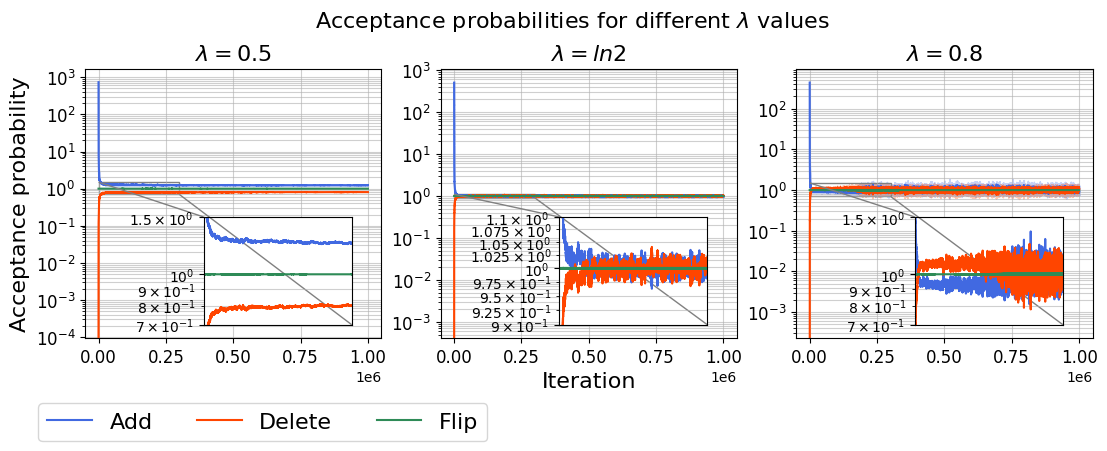

In [62]:
# Show for 0.5, ln(2) and 0.8 in one plot
lambdas = [0.5, np.log(2), 0.8]
lambdas_string = ['0.5', 'ln2', '0.76']

figure, axes = plt.subplots(1, 3, figsize=(13, 3.5))

for i, l in enumerate(lambdas):
    # Get filepaths for first lambda
    path = f'measurements/lambd={lambdas_string[i]}'
    ar_add_paths = glob.glob(f'{path}/ar_add*.npy')
    ar_del_paths = glob.glob(f'{path}/ar_del*.npy')
    ar_flip_paths = glob.glob(f'{path}/ar_flip*.npy')

    # Load all the files
    ar_add = []
    ar_del = []
    ar_flip = []
    for j in range(len(ar_add_paths)):
        add = np.load(ar_add_paths[j])
        delete = np.load(ar_del_paths[j])
        flip = np.load(ar_flip_paths[j])

        if add.shape[0] == iterations:
            ar_add.append(add)
            ar_del.append(delete)
            ar_flip.append(flip)
        
    # Debug prints
    print(f'Iteration {i}, lambda {l}')
    print('ar_add shapes:', [a.shape for a in ar_add])
    print('ar_del shapes:', [a.shape for a in ar_del])
    print('ar_flip shapes:', [a.shape for a in ar_flip])

    # Make numpy arrays
    ar_add = np.array(ar_add)
    ar_del = np.array(ar_del)
    ar_flip = np.array(ar_flip)

    # Plot
    axes[i].plot(ar_add.mean(axis=0), label='Add', c='royalblue')
    axes[i].plot(ar_del.mean(axis=0), label='Delete', c='orangered')
    axes[i].plot(ar_flip.mean(axis=0), label='Flip', c='seagreen')

    axes[i].fill_between(np.arange(iterations), ar_add.mean(axis=0) - ar_add.std(axis=0), ar_add.mean(axis=0) + ar_add.std(axis=0), color='royalblue', alpha=0.3)
    axes[i].fill_between(np.arange(iterations), ar_del.mean(axis=0) - ar_del.std(axis=0), ar_del.mean(axis=0) + ar_del.std(axis=0), color='orangered', alpha=0.3)
    axes[i].fill_between(np.arange(iterations), ar_flip.mean(axis=0) - ar_flip.std(axis=0), ar_flip.mean(axis=0) + ar_flip.std(axis=0), color='seagreen', alpha=0.3)

    axes[i].set_yscale('log')
    axes[i].set_xlabel('Iteration', fontsize=16)
    axes[i].set_ylabel('Acceptance probability', fontsize=16)
    if l == np.log(2):
        axes[i].set_title(f'$\lambda = ln2$', fontsize=16)
    else:
        axes[i].set_title(f'$\lambda = {lambdas[i]}$', fontsize=16)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(True, which="both", ls="-", alpha=0.6)

    # Add zoom-in box
    axins = axes[i].inset_axes([0.4, 0.05, 0.5, 0.4])
    axins.plot(ar_add.mean(axis=0), label='Add', c='royalblue')
    axins.plot(ar_del.mean(axis=0), label='Delete', c='orangered')
    axins.plot(ar_flip.mean(axis=0), label='Flip', c='seagreen')
    axins.set_yscale('log')
    if i == 0:
        axins.set_xlim(0, 300000)
        axins.set_ylim(0.7, 1.5)
        axins.set_yticks([0.7, 1, 1.5])
        axes[i].set_xlabel('')
    elif i == 1:
        axins.set_xlim(0, 300000)
        axins.set_ylim(0.9, 1.1)
        axins.set_yticks([0.9, 1, 1.1])
        axes[i].set_ylabel('')
    elif i == 2:
        axins.set_xlim(0, 300000)
        axins.set_ylim(0.7, 1.5)
        axins.set_yticks([0.7, 1, 1.5])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    axins.grid(True, which="both", ls="-", alpha=0.6)
    axins.set_xticks([])
    mark_inset(axes[i], axins, loc1=2, loc2=4, fc="none", ec="0.5")

figure.suptitle('Acceptance probabilities for different $\lambda$ values', fontsize=16, y=1.05)

# Add legend below the plots
axes[0].legend(loc='upper center', bbox_to_anchor=(0.6, -0.2), ncol=3, fontsize=16)

# Save
savepath = 'plots/acceptance_probabilities_2d.png'
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Clean files in memory
del ar_add, ar_del, ar_flip, ar_add_paths, ar_del_paths, ar_flip_paths


### Succes rates

<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:66: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:66: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\1512680462.py:51: SyntaxWarning: invalid escape sequence '\l'
  axes[i].set_title(f'$\lambda = {lambdas_string[i]}$', fontsize=16)
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\1512680462.py:66: SyntaxWarning: invalid escape sequence '\l'
  figure.suptitle('Success rates for different $\lambda$ values', fontsize=16, y=1.05)
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\1512680462.py:28: RuntimeWarning: invalid value encountered in divide
  add_rates.append(add_success / (add_success + add_fail))
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\1512680462.py:29: RuntimeWarning: invalid value encountered in divide
  del_rates.append(del_success / (del_success + del_fail))
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\15126804

Iteration 0, lambda 0.5
add_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,)]
del_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,)]
flip_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,)]
Iteration 1, lambda 0.6931471805599453
add_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,)]
del_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,)]
flip_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,), (1000001,)]
Iteration 2, lambda 0.8
add_rates shapes: [(1000001,), (1000001,), (1000001,), (1000001,), (1000001,)

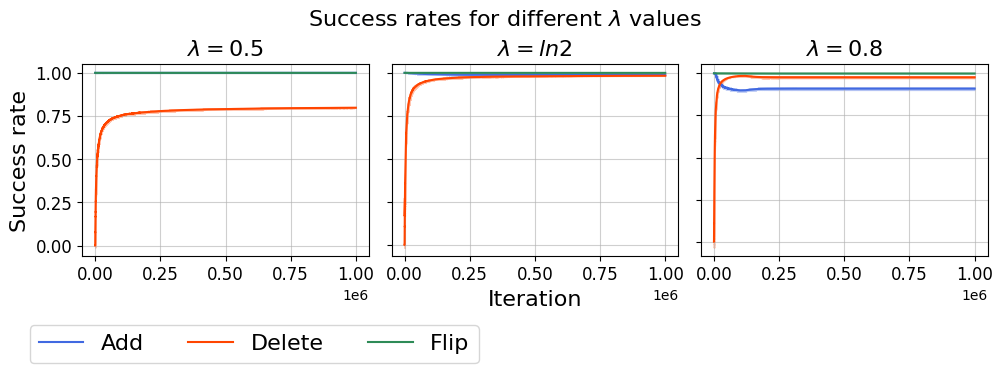

In [54]:
lambdas_string = ['0.5', 'ln2', '0.8']

figure, axes = plt.subplots(1, 3, figsize=(10, 3))

for i, l in enumerate(lambdas):
    # Get filepaths for first lambda
    path = f'measurements/lambd={lambdas_string[i]}'
    add_success_paths = glob.glob(f'{path}/count_add*.npy')
    add_fail_paths = glob.glob(f'{path}/failed_add*.npy')
    del_success_paths = glob.glob(f'{path}/count_del*.npy')
    del_fail_paths = glob.glob(f'{path}/failed_delete*.npy')
    flip_success_paths = glob.glob(f'{path}/count_flip*.npy')
    flip_fail_paths = glob.glob(f'{path}/failed_flip*.npy')

    # Load all the files
    add_rates = []
    del_rates = []
    flip_rates = []

    for j in range(len(add_success_paths)):
        add_success = np.load(add_success_paths[j])
        add_fail = np.load(add_fail_paths[j])
        del_success = np.load(del_success_paths[j])
        del_fail = np.load(del_fail_paths[j])
        flip_success = np.load(flip_success_paths[j])
        flip_fail = np.load(flip_fail_paths[j])
    
        add_rates.append(add_success / (add_success + add_fail))
        del_rates.append(del_success / (del_success + del_fail))
        flip_rates.append(flip_success / (flip_success + flip_fail))

    add_rates = np.array(add_rates)
    del_rates = np.array(del_rates)
    flip_rates = np.array(flip_rates)

    # Debug prints
    print(f'Iteration {i}, lambda {l}')
    print('add_rates shapes:', [a.shape for a in add_rates])
    print('del_rates shapes:', [a.shape for a in del_rates])
    print('flip_rates shapes:', [a.shape for a in flip_rates])

    # Plot
    axes[i].plot(add_rates.mean(axis=0), label='Add', c='royalblue')
    axes[i].plot(del_rates.mean(axis=0), label='Delete', c='orangered')
    axes[i].plot(flip_rates.mean(axis=0), label='Flip', c='seagreen')
    axes[i].fill_between(np.arange(iterations + 1), add_rates.mean(axis=0) - add_rates.std(axis=0), add_rates.mean(axis=0) + add_rates.std(axis=0), color='royalblue', alpha=0.3)
    axes[i].fill_between(np.arange(iterations + 1), del_rates.mean(axis=0) - del_rates.std(axis=0), del_rates.mean(axis=0) + del_rates.std(axis=0), color='orangered', alpha=0.3)
    axes[i].fill_between(np.arange(iterations + 1), flip_rates.mean(axis=0) - flip_rates.std(axis=0), flip_rates.mean(axis=0) + flip_rates.std(axis=0), color='seagreen', alpha=0.3)
    axes[i].set_xlabel('Iteration', fontsize=16)
    axes[i].set_ylabel('Success rate', fontsize=16)
    axes[i].set_title(f'$\lambda = {lambdas_string[i]}$', fontsize=16)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(True, which="both", ls="-", alpha=0.6)

    if i == 0:
        axes[i].set_xlabel('')   
    elif i == 1:
        axes[i].set_ylabel('')
        axes[i].yaxis.set_major_formatter(NullFormatter())
    elif i == 2:
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].yaxis.set_major_formatter(NullFormatter())

plt.tight_layout()
figure.suptitle('Success rates for different $\lambda$ values', fontsize=16, y=1.05)
axes[0].legend(loc='upper center', bbox_to_anchor=(0.6, -0.3), ncol=3, fontsize=16)
savepath = 'plots/success_rates_2d.png'
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(savepath, dpi=400, bbox_inches='tight')



### Volume changes

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\789561118.py:22: SyntaxWarning: invalid escape sequence '\l'
  axes[i].set_title(f'$\lambda = {lambdas_string[i]}$', fontsize=16)
C:\Users\sedad\AppData\Local\Temp\ipykernel_25944\789561118.py:37: SyntaxWarning: invalid escape sequence '\l'
  figure.suptitle('Volume changes for different $\lambda$ values', fontsize=16, y=1.05)


Iteration 0, lambda 0.5
volumes shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
Iteration 1, lambda 0.6931471805599453
volumes shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]
Iteration 2, lambda 0.8
volumes shapes: [(1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,), (1000000,)]


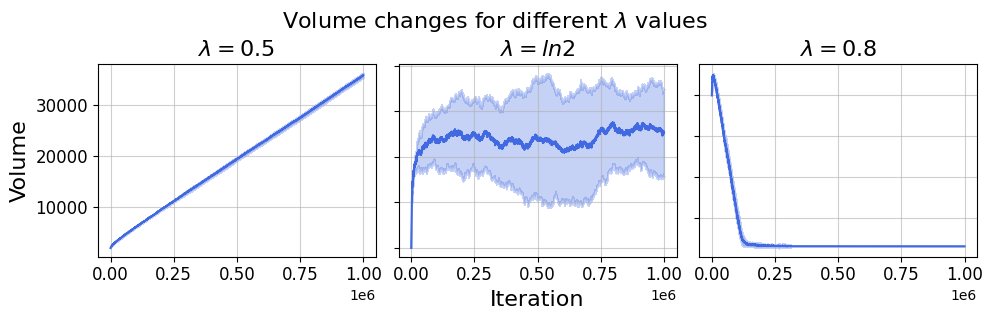

In [55]:
lambdas_string = ['0.5', 'ln2', '0.8']

figure, axes = plt.subplots(1, 3, figsize=(10, 3))

for i, l in enumerate(lambdas):
    # Get filepaths for first lambda
    path = f'measurements/lambd={lambdas_string[i]}'
    vol_paths = glob.glob(f'{path}/volume_changes*.npy')

    # Load all the files
    volumes = [np.load(p) for p in vol_paths]

    # Debug prints
    print(f'Iteration {i}, lambda {l}')
    print('volumes shapes:', [v.shape for v in volumes])

    # Plot
    axes[i].plot(np.array(volumes).mean(axis=0), c='royalblue')
    axes[i].fill_between(np.arange(iterations), np.array(volumes).mean(axis=0) - np.array(volumes).std(axis=0), np.array(volumes).mean(axis=0) + np.array(volumes).std(axis=0), color='royalblue', alpha=0.3)
    axes[i].set_xlabel('Iteration', fontsize=16)
    axes[i].set_ylabel('Volume', fontsize=16)
    axes[i].set_title(f'$\lambda = {lambdas_string[i]}$', fontsize=16)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(True, which="both", ls="-", alpha=0.6)

    if i == 0:
        axes[i].set_xlabel('')
    elif i == 1:
        axes[i].set_ylabel('')
        axes[i].yaxis.set_major_formatter(NullFormatter())
    elif i == 2:
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].yaxis.set_major_formatter(NullFormatter())

plt.tight_layout()
figure.suptitle('Volume changes for different $\lambda$ values', fontsize=16, y=1.05)
savepath = 'plots/volume_changes_2d.png'
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(savepath, dpi=400, bbox_inches='tight')
